In [1]:
%matplotlib inline

import numpy as np # grey images are stored in memory as 2D arrays, color images as 3D arrays
import cv2 as cv2 # opencv computer vision library
from skimage import io # for io.imread
from matplotlib import pyplot as plt # ploting
from matplotlib import colors # ploting

In [2]:

def imshow(images, titles, nrows = 0, ncols=0, figsize = (15,20)):
    """Plot a multiple images with titles.

    Parameters
    ----------
    images : image list
    titles : title list
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    if ncols == 0 and nrows == 0:
      ncols = len(images)
      nrows = 1
    if ncols == 0:
      ncols = len(images) // nrows
    if nrows == 0:
      nrows = len(images) // ncols
      
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, squeeze=False, figsize = figsize)
    for i, image in enumerate(images):
        axeslist.ravel()[i].imshow(image, cmap=plt.gray(), vmin=0, vmax=255)
        axeslist.ravel()[i].set_title(titles[i])
        axeslist.ravel()[i].set_axis_off()
    plt.tight_layout() # optional


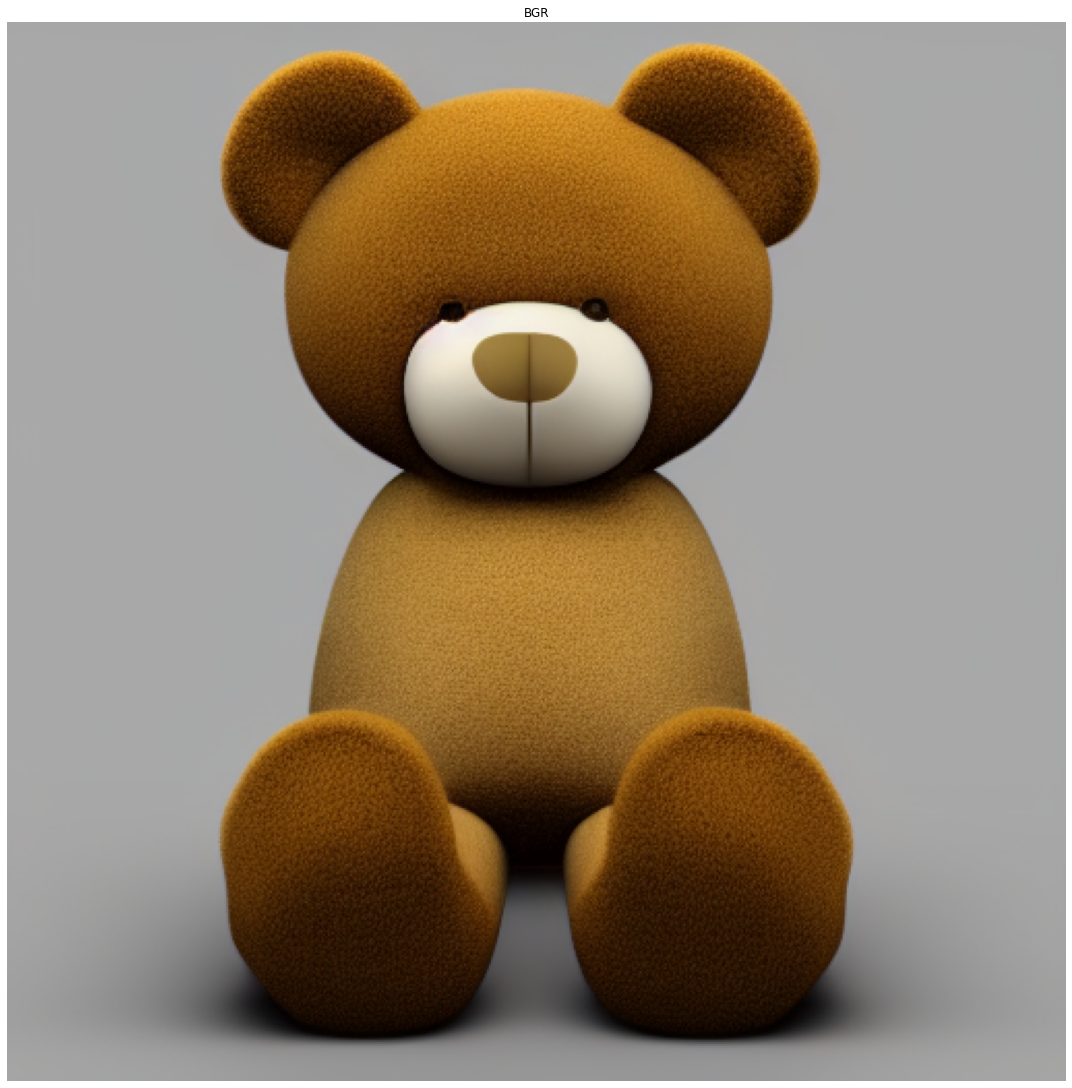

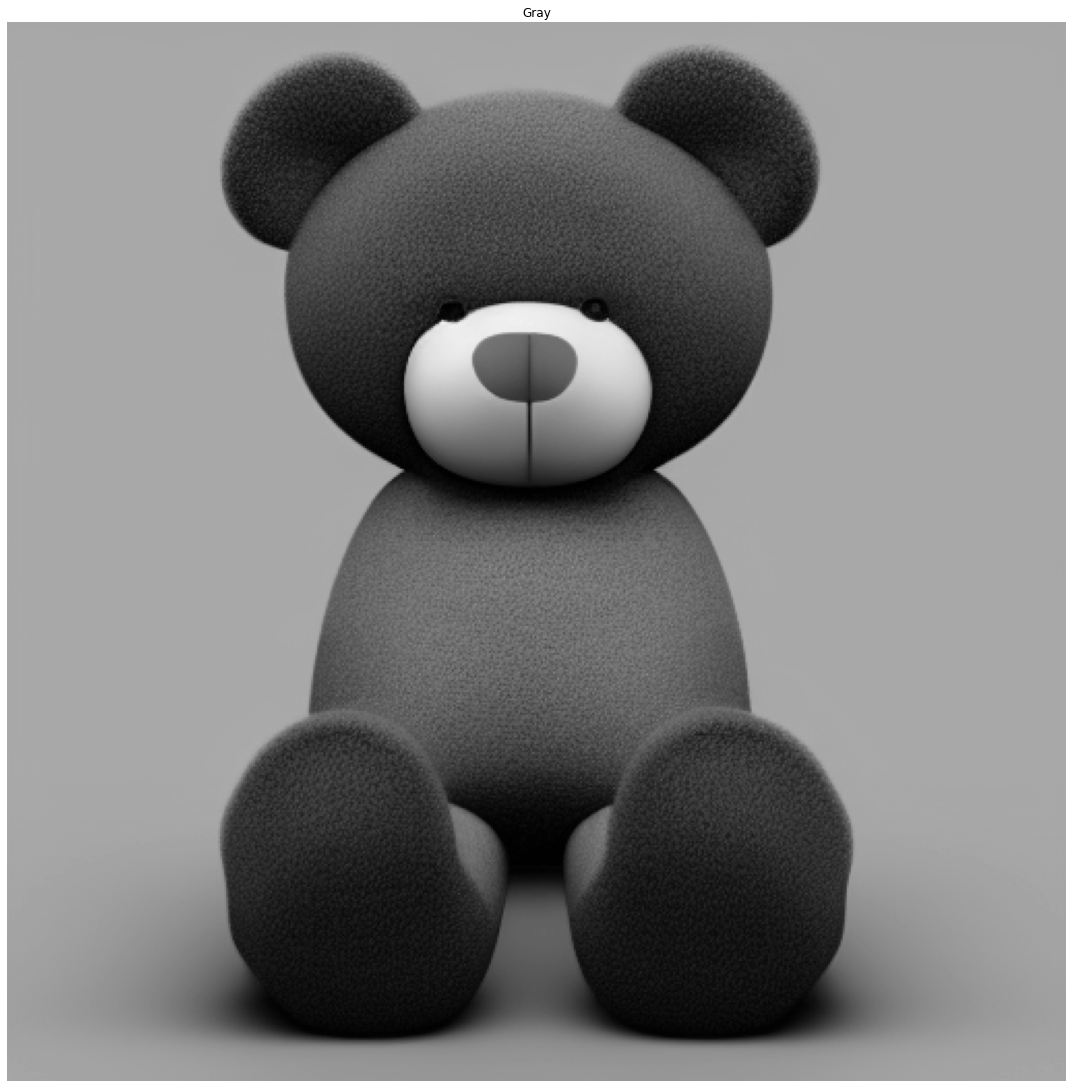

In [5]:
imageBGR = io.imread("./bear.png") 
imshow( [imageBGR], ['BGR'])
imageGray = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2GRAY)
imshow( [imageGray], ['Gray'])

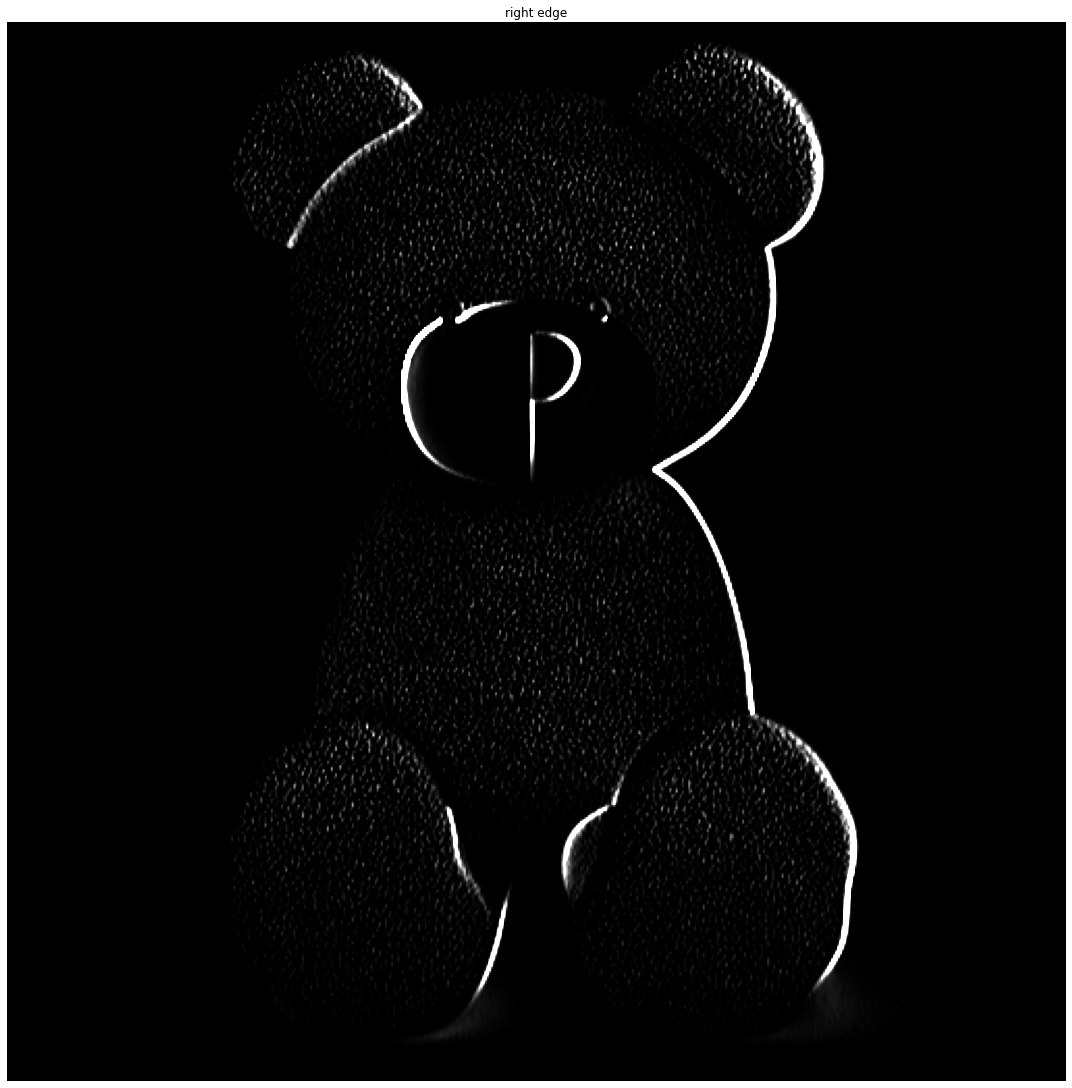

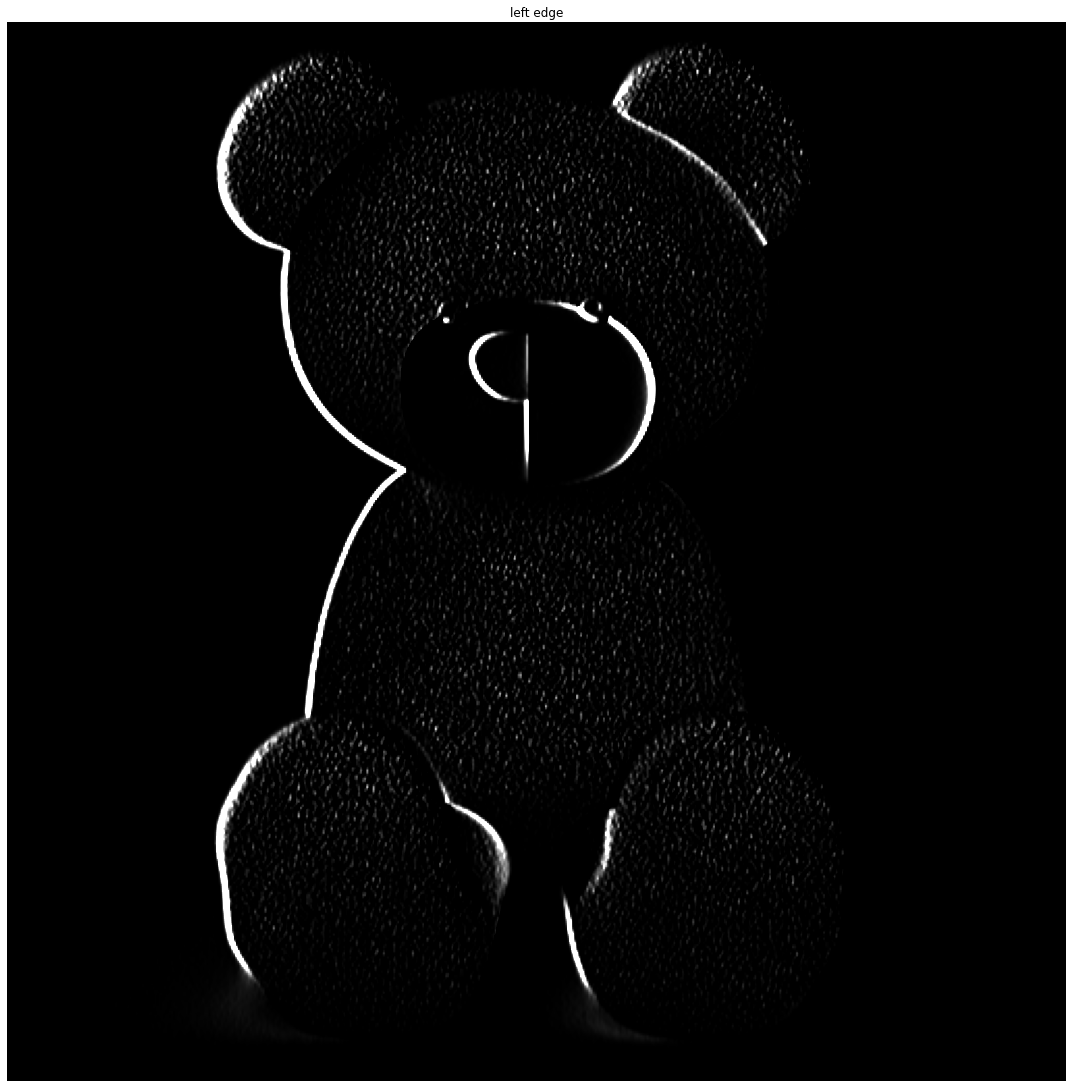

In [63]:
# We detect the right/left edges 

def right_edge_filter(img):
  img = img.astype(float)
  return -img[:-2,:-2] -2*img[1:-1,:-2] -img[2:,:-2] + img[0:-2,2:] + 2*img[1:-1,2:] + img[2:,2:]


right_edge_im = right_edge_filter(imageGray)/8
right_edge_im = (right_edge_im**2)*np.sign(right_edge_im)

left_edge_im = -right_edge_im

imshow( [right_edge_im], ['right edge'])
imshow( [left_edge_im], ['left edge'])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

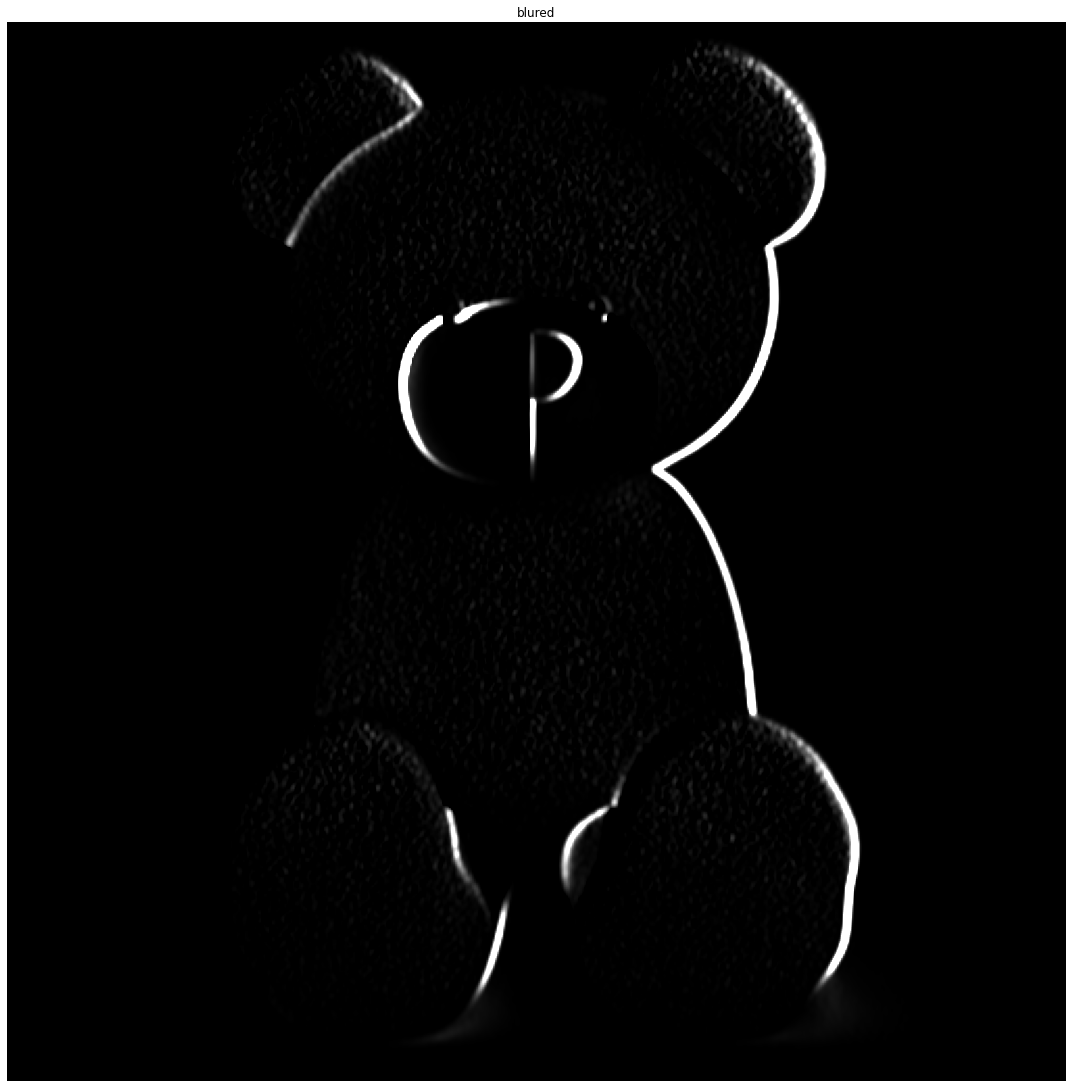

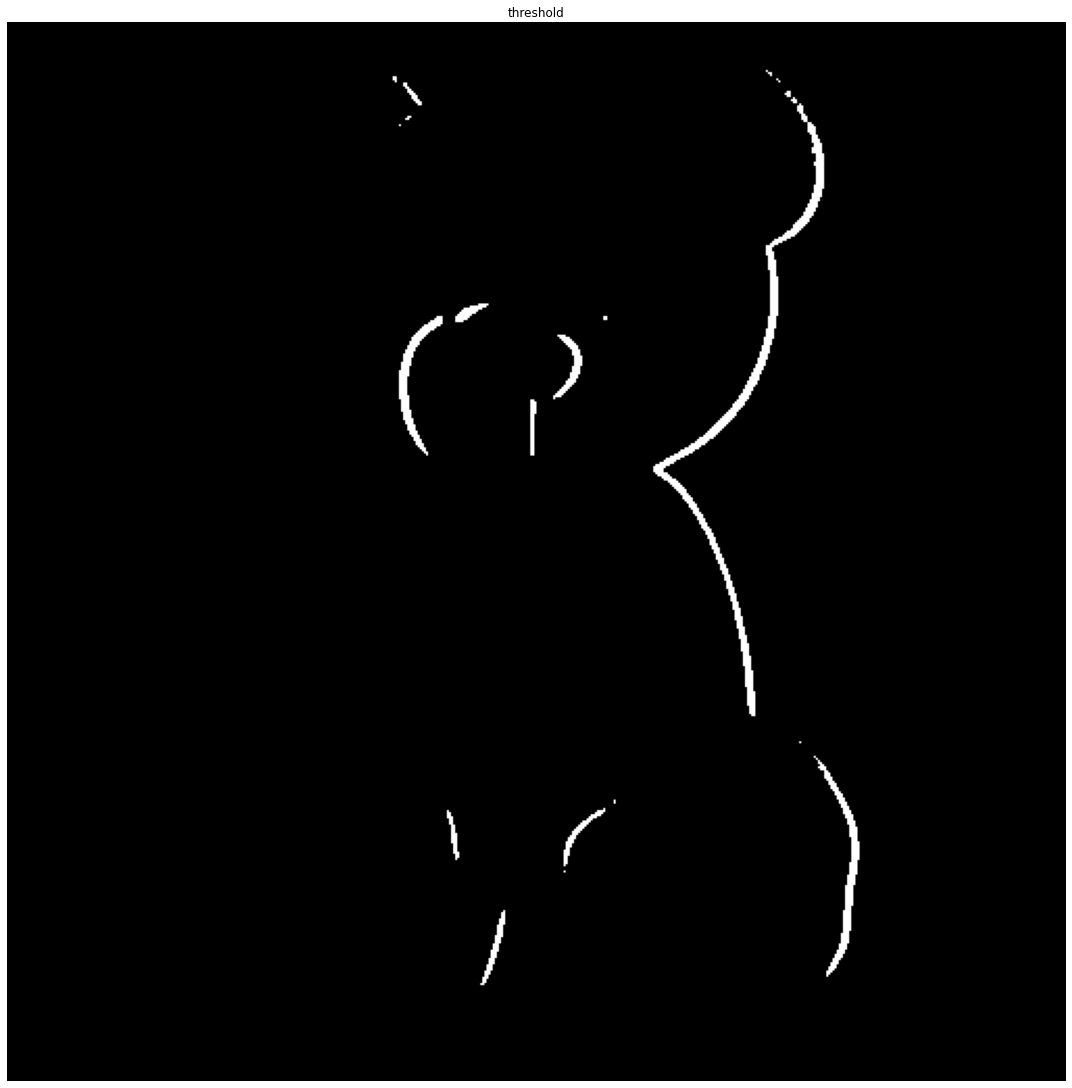

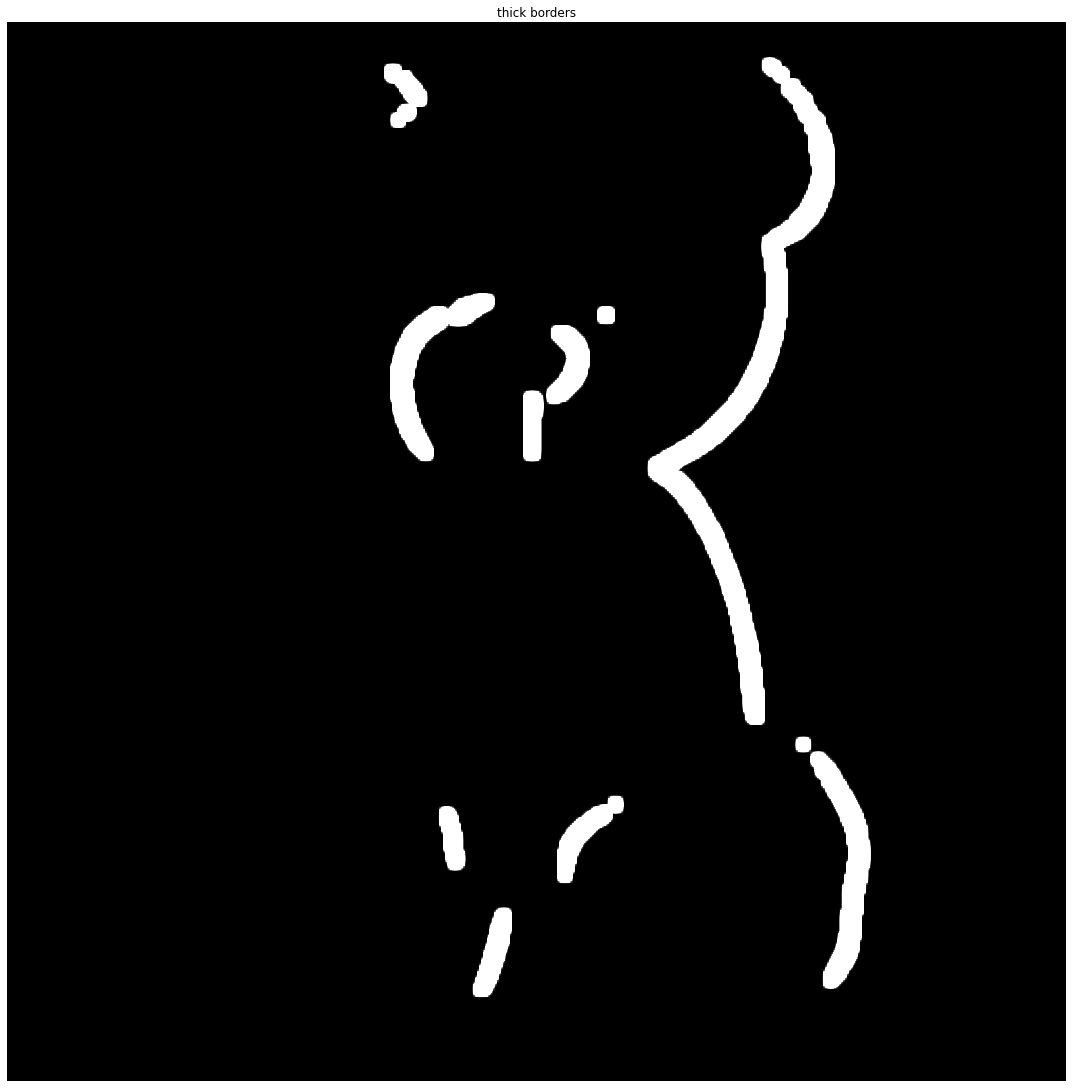

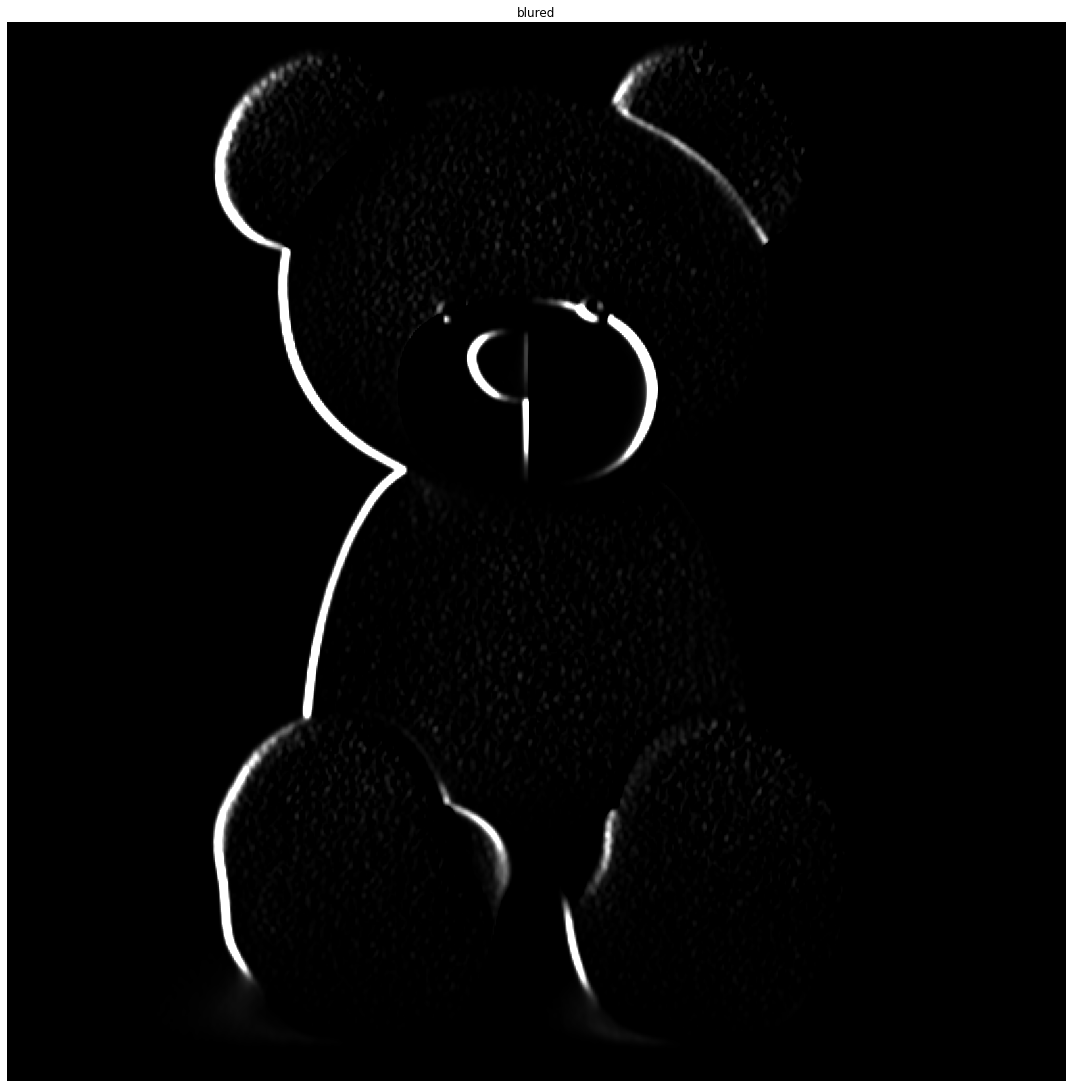

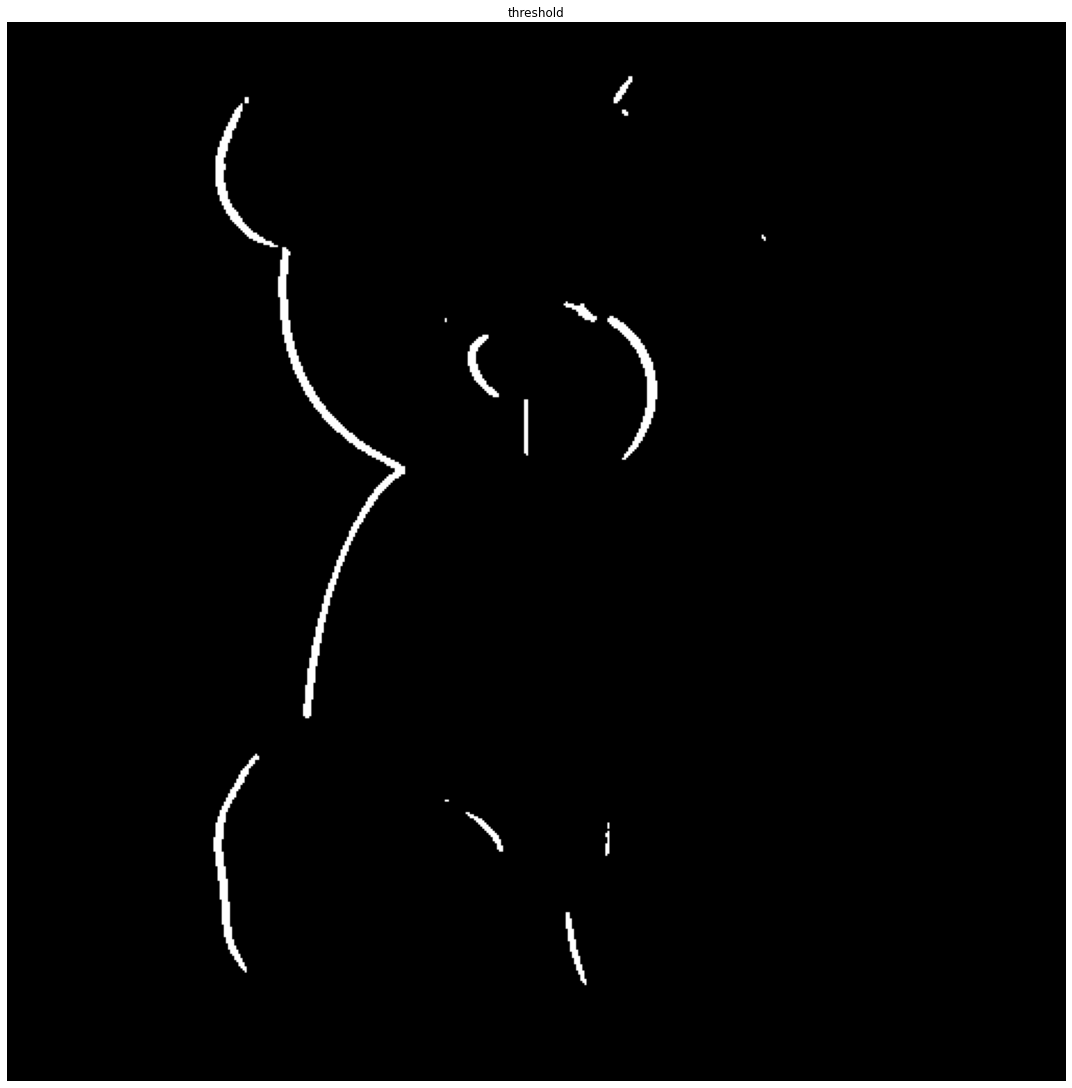

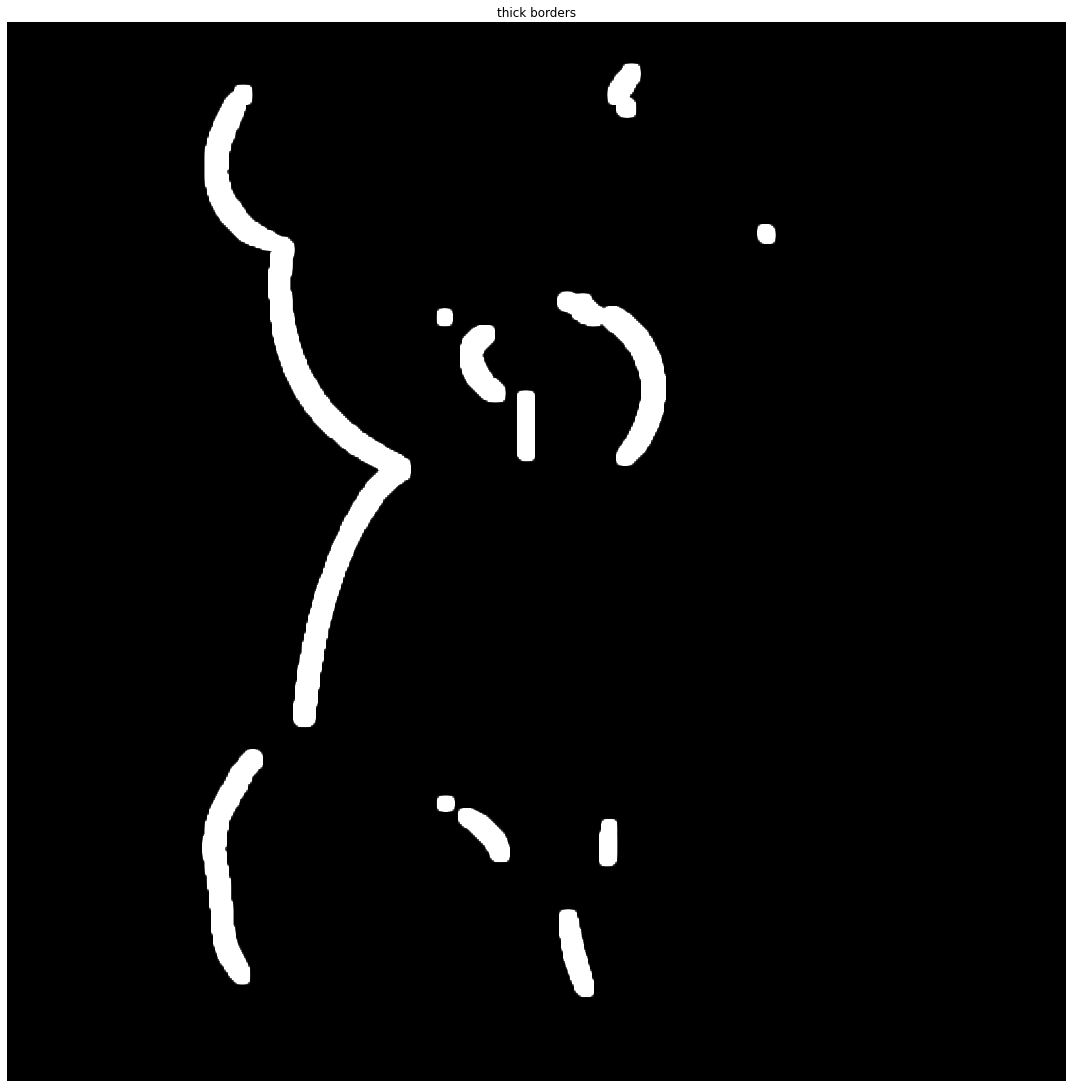

In [65]:
# We convert our image into usable masks

def blur(img):
  img = img.astype(float)
  return img[1:-1,1:-1] + (1.0/np.sqrt(2))*img[2:,:-2] + img[2:,1:-1] + (1.0/np.sqrt(2))*img[2:,2:] + (1.0/np.sqrt(2))*img[:-2,:-2] + img[:-2,1:-1] + (1.0/np.sqrt(2))*img[:-2,2:] + img[1:-1,:-2] + img[1:-1,2:]

def threshold(img, value):
  return np.choose(img > value, [0, 255])

def border_mask(img):
    
    # We denoise by appying a circular bluring filter then a threshold
    blured = blur(img)/9
    imshow([blured], ['blured'])
    threshold_image = threshold(blured, 200)
    imshow([threshold_image], ['threshold'])
    
    # We make the borders bigger by applying successively the bluring effect without normalising
    thick_borders = blur(blur(blur(threshold_image)))
    imshow([thick_borders], ['thick borders'])
    
    return thick_borders

border_mask(right_edge_im)
border_mask(left_edge_im)

In [42]:
# We now compute 

error: OpenCV(4.0.1) c:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.hpp:261: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<1,-1,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)
